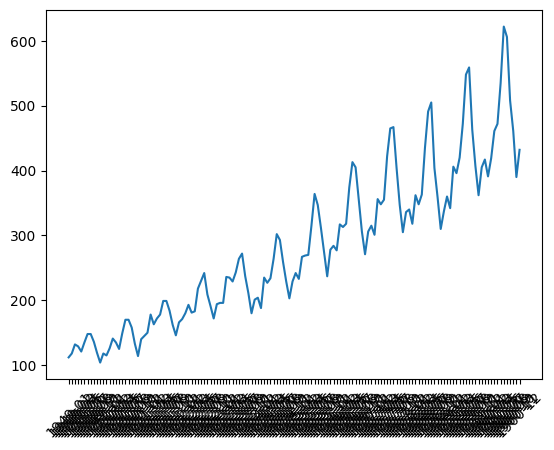

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", index_col="Month")
plt.plot(df.index, df.Passengers)
plt.xticks(rotation=45)
plt.show()

In [2]:
import tensorflow as tf
tf.random.set_seed(42) # for reproducibility

In [3]:
passenger_count_df = df.Passengers
passenger_count = passenger_count_df.values

In [4]:
passenger_count = passenger_count.astype('float32')
passenger_count = passenger_count.reshape(-1, 1)

In [8]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
passenger_count = scaler.fit_transform(passenger_count)


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
train_size = int(len(passenger_count) * 0.67)
test_size = len(passenger_count) - train_size

In [12]:
train, test = passenger_count[0:train_size,:], passenger_count[train_size:len(passenger_count),:]

In [13]:
train

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [14]:
test

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.633

In [20]:
# creates a dataset where X = number of passengers at a given time (t), and Y = number of passengers at the next time (t + 1).
import numpy as np
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
         a = dataset[i:(i+look_back), 0]
         dataX.append(a)
         dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
# LSTM network expects the input data (X) to be provided with a specific structure [samples, time steps, features].
# Currently, the data is in the form of [samples, features], with one time step for each sample
# Will need to reshape
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - loss: 0.0433 - 3s/epoch - 32ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0218 - 275ms/epoch - 3ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0166 - 259ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0154 - 290ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0145 - 276ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0137 - 293ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0129 - 250ms/epoch - 3ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0122 - 258ms/epoch - 3ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0114 - 246ms/epoch - 3ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0108 - 285ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0100 - 298ms/epoch - 3ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0094 - 301ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0085 - 300ms/epoch - 3ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0078 - 257ms/epoch - 3ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0071 - 258ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0065 - 309ms/epoc

In [28]:
train_prediction = model.predict(trainX)
test_prediction = model.predict(testX)
# invert predictions before calculating error scores to ensure performance is in same units as original data (1000's passengers/mth)
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 5ms/step


In [29]:
from sklearn.metrics import mean_squared_error
train_mse = np.sqrt(mean_squared_error(trainY[0], train_prediction[:, 0]))
test_mse = np.sqrt(mean_squared_error(testY[0], test_prediction[:, 0]))

print(f'train mse: {train_mse:.2f}')
print(f'test mse: {test_mse:.2f}')

train mse: 22.74
test mse: 48.73


In [33]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(passenger_count)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction)+look_back, :] = train_prediction
# repeat for test predictions
testPredictPlot = np.empty_like(passenger_count)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction)+(look_back*2)+1:len(passenger_count)-1, :] = test_prediction

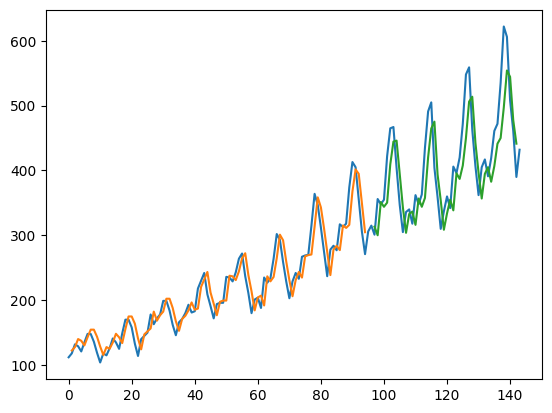

In [35]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(passenger_count))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()